In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression

In [2]:
file=pd.read_csv('csv_files/marketing_customer_analysis.csv')
display(file.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
def low(df):
    col=[]
    for column in df.columns:
        col.append(column.lower())
    df.columns=col
    return df.head(2)

In [4]:
low(file)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [5]:
file._get_numeric_data()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [6]:
file.select_dtypes(include=['object']).columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [7]:
file.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [8]:
nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
display(nulls_df)

,header_name,percent_nulls
0,customer,0.0
1,state,0.0
2,customer lifetime value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective to date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [9]:
file['state'].value_counts(dropna=False)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

the easiest to implement solution, although potentially not the best is to assign the null values to the mode of the column

In [10]:
mode_state=(file['state'].mode())
file['state']=file['state'].fillna(mode_state[0])
file['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [11]:
file['response'].value_counts(dropna=False)

No     7826
Yes    1308
Name: response, dtype: int64

It's a reasonable guess that null values for the collumn response would be no, that's what we're changing them to

In [12]:
no_response='No'
file['response']=file['response'].fillna(no_response)
file['response'].value_counts(dropna=False)

No     7826
Yes    1308
Name: response, dtype: int64

In [13]:
file['months since last claim'].value_counts(dropna=False)

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months since last claim, dtype: int64

There isn't a very straightforward solution to fixing this issue, so i'll simply compute all the null values as the mean of the column

In [14]:
avg_months=round(np.mean(file['months since last claim']))
file['months since last claim']=file['months since last claim'].fillna(avg_months)
file['months since last claim'].value_counts(dropna=False)

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months since last claim, dtype: int64

In [15]:
file['number of open complaints'].value_counts(dropna=False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number of open complaints, dtype: int64

Once again, we'll be making a reasonable guess that null values could simply mean the customer didn't have any open complaints

In [16]:
no_complaints=0.0
file['number of open complaints']=file['number of open complaints'].fillna(no_complaints)
file['number of open complaints'].value_counts(dropna=False)

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number of open complaints, dtype: int64

In [17]:
file['vehicle class'].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle class, dtype: int64

given all the unique values, i'll chosse to simple aggregate the null values into the mode of the column

In [18]:
mode_vclass=file['vehicle class'].mode()
file['vehicle class']=file['vehicle class'].fillna(mode_vclass[0])
file['vehicle class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle class, dtype: int64

In [19]:
file['vehicle size'].value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle size, dtype: int64

given all the unique values, i'll chosse to simple aggregate the null values into the mode of the column

In [20]:
mode_vsize=file['vehicle size'].mode()
file['vehicle size']=file['vehicle size'].fillna(mode_vsize[0])
file['vehicle size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle size, dtype: int64

Considering the only non null value in this column is 'A' we could either drop the column, since we already have other information on the customer's car anyways, or we could simply guess that ALL vehicles are type A which makes the column have no value either way

In [21]:
f_nulls_df = pd.DataFrame(round(file.isna().sum()/len(file),4)*100)
f_nulls_df = f_nulls_df.reset_index()
f_nulls_df.columns = ['header_name', 'percent_nulls']
display(f_nulls_df)

,header_name,percent_nulls
0,customer,0.0
1,state,0.0
2,customer lifetime value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective to date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [22]:
#file['effective to date'] = pd.to_datetime(file['effective to date'])
#file[['effective to date']].dtypes

In [23]:
#file['month']=file['effective to date'].dt.month
#display(file['month'].head())

In [24]:
#first_quarter=file[(file['month']==1) | (file['month']==2) | (file['month']==3)]
#display(first_quarter)

'''

LAB 3 STARTS HERE

In [25]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [26]:
file.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='response', ylabel='count'>

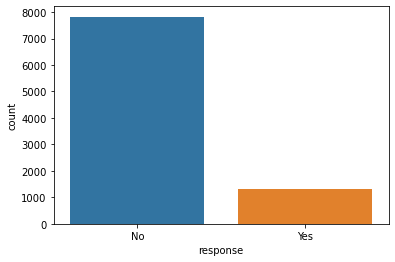

In [28]:
sns.countplot(data=file, x="response")

<AxesSubplot:xlabel='sales channel', ylabel='count'>

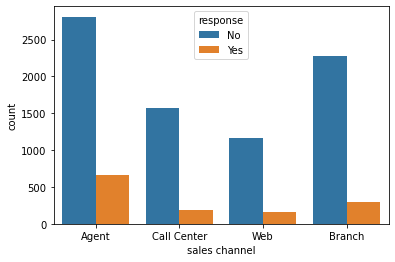

In [29]:
sns.countplot(data=file, x='sales channel', hue='response')

<AxesSubplot:xlabel='total claim amount', ylabel='response'>

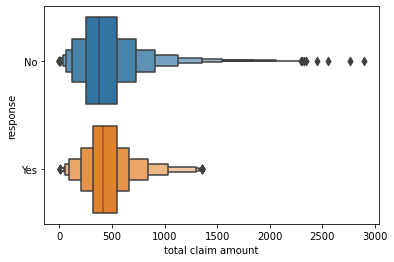

In [30]:
sns.boxenplot(data=file, x='total claim amount', y='response')

<AxesSubplot:xlabel='income', ylabel='Count'>

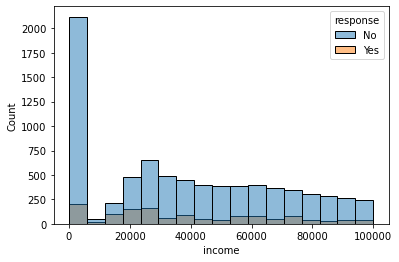

In [31]:
sns.histplot(data=file, x='income', hue='response')

''''

LAB 4 STARTS HERE

In [32]:
file.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [33]:
numerical=file.select_dtypes(include=np.number)
categorical=file.select_dtypes(include=object)
display(numerical.dtypes)
display(categorical.dtypes)

customer lifetime value          float64
income                             int64
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
total claim amount               float64
dtype: object

customer             object
state                object
response             object
coverage             object
education            object
effective to date    object
employmentstatus     object
gender               object
location code        object
marital status       object
policy type          object
policy               object
renew offer type     object
sales channel        object
vehicle class        object
vehicle size         object
dtype: object

In [34]:
categorical=categorical.drop(columns=['customer'])

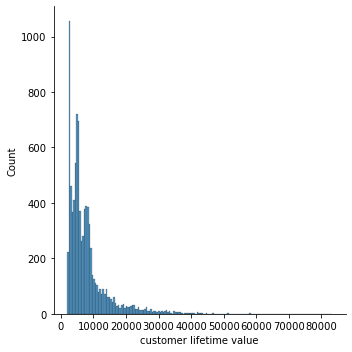

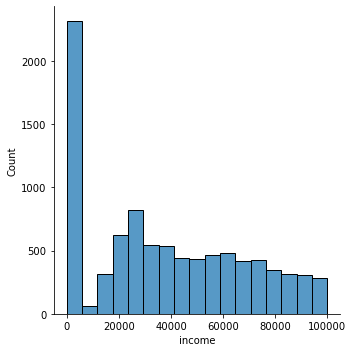

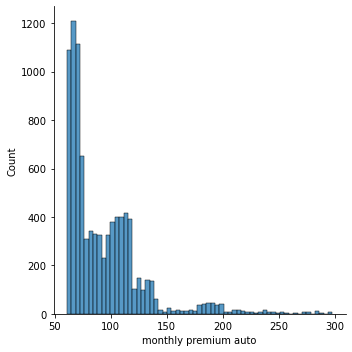

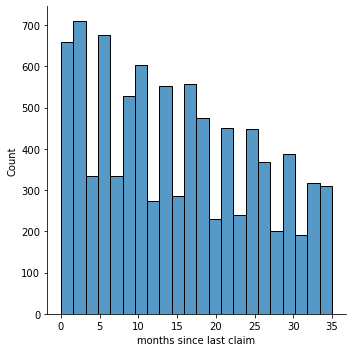

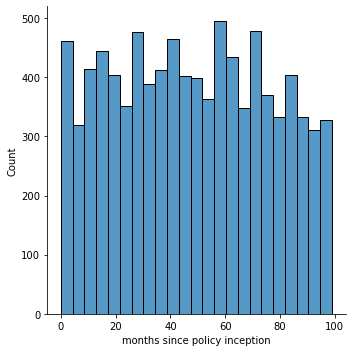

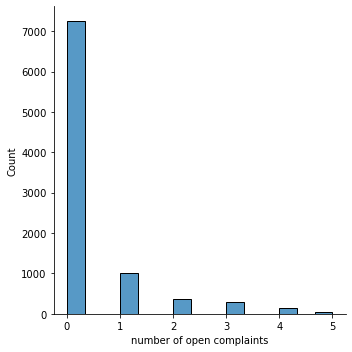

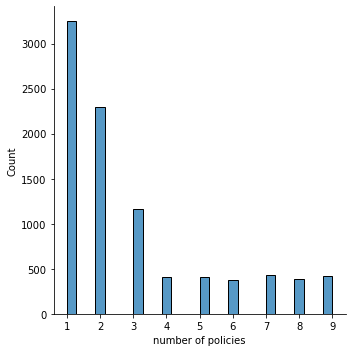

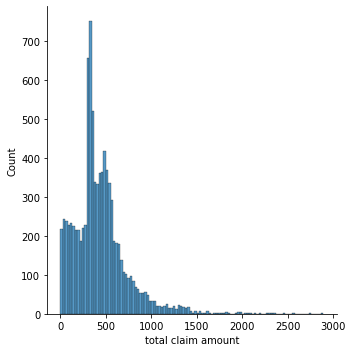

In [35]:
for col in numerical.columns:
    sns.displot(numerical[col])

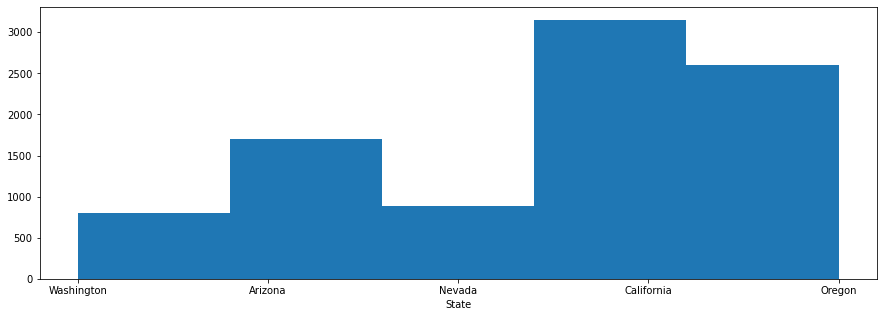

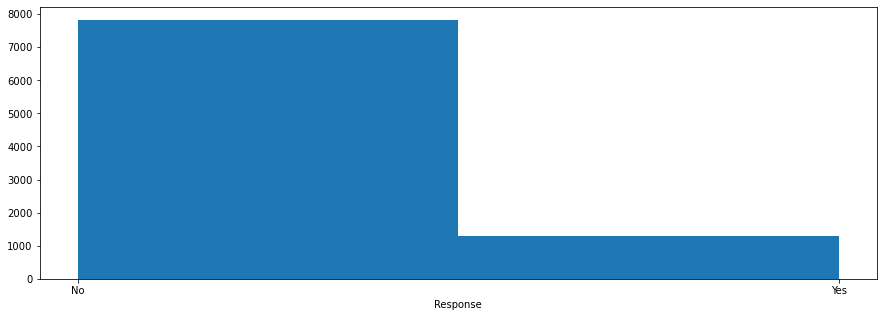

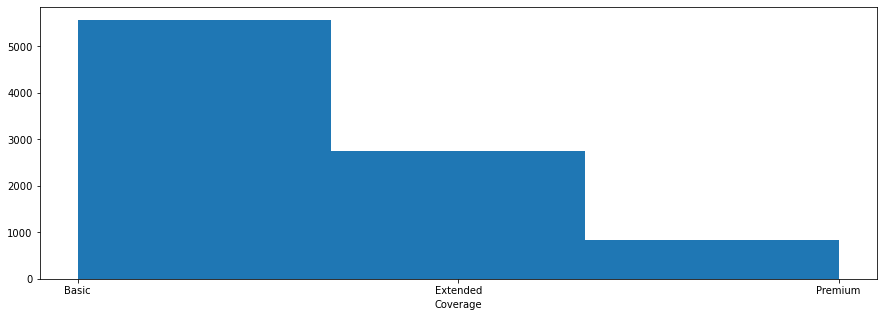

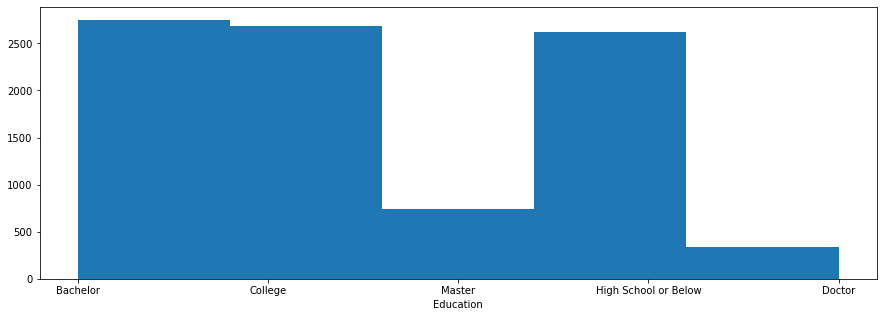

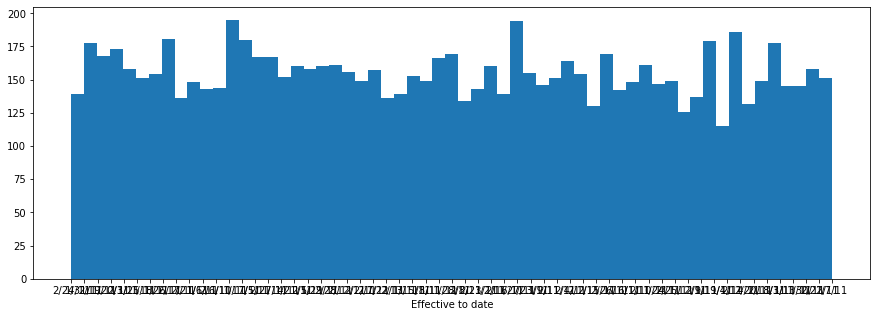

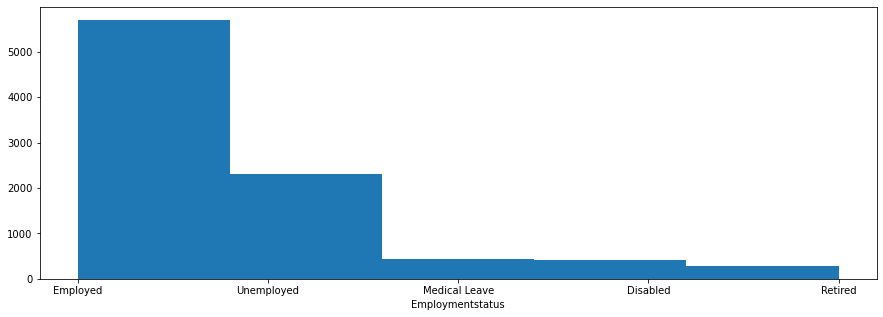

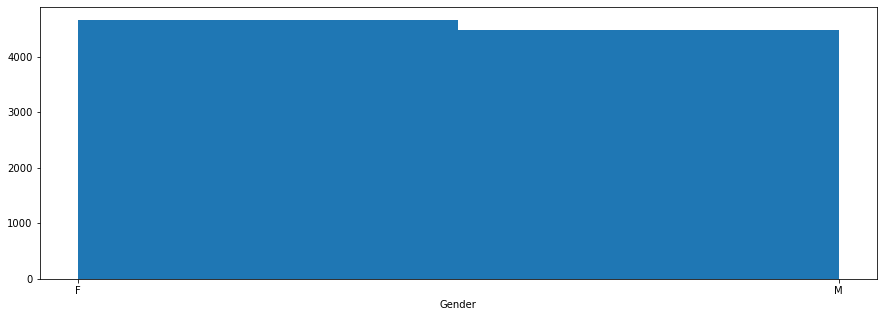

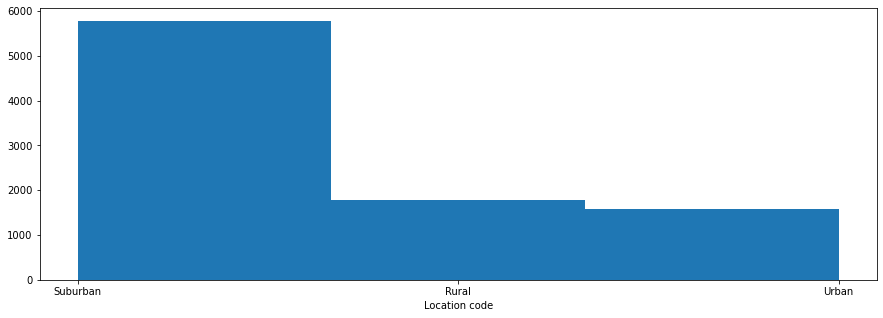

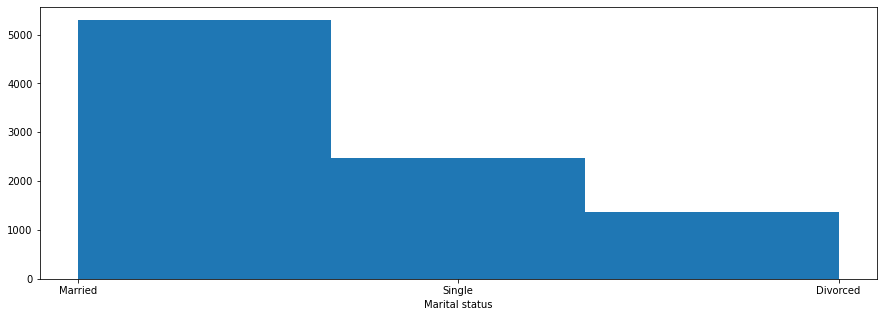

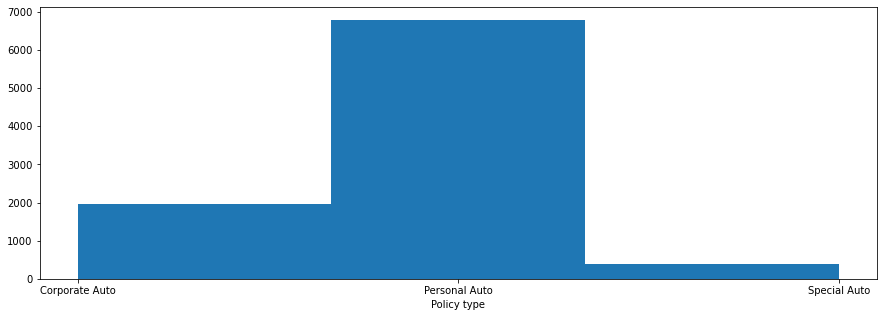

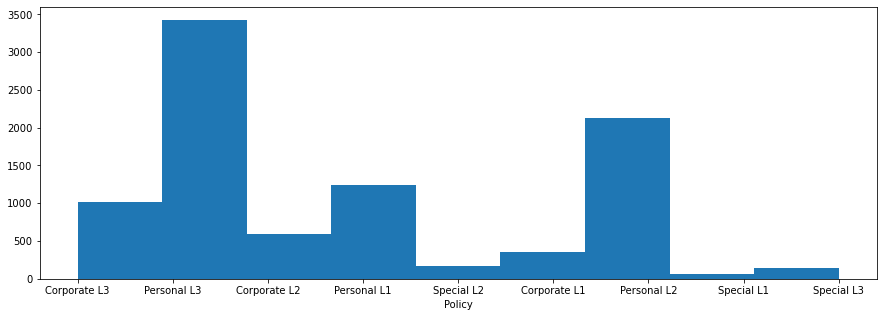

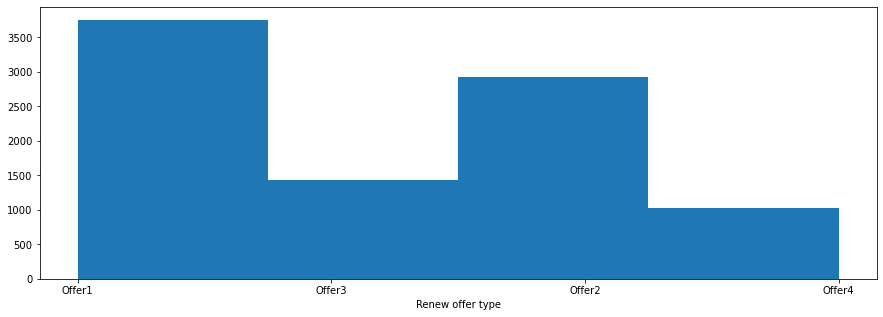

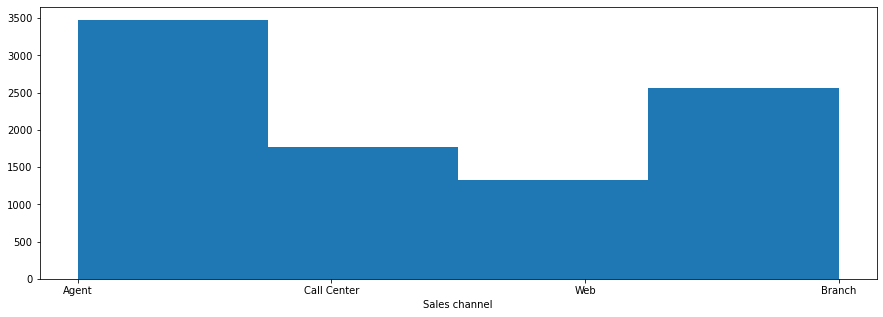

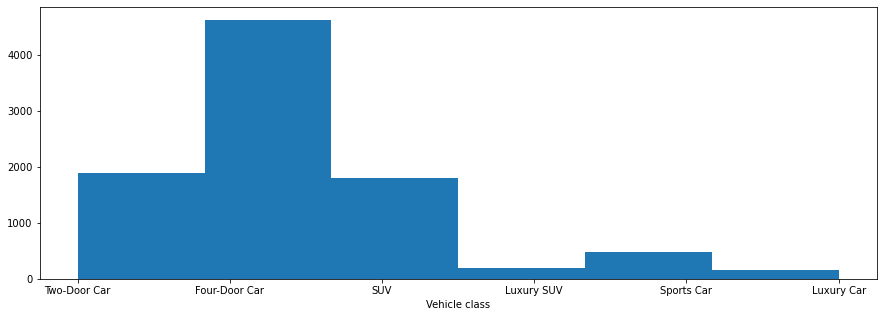

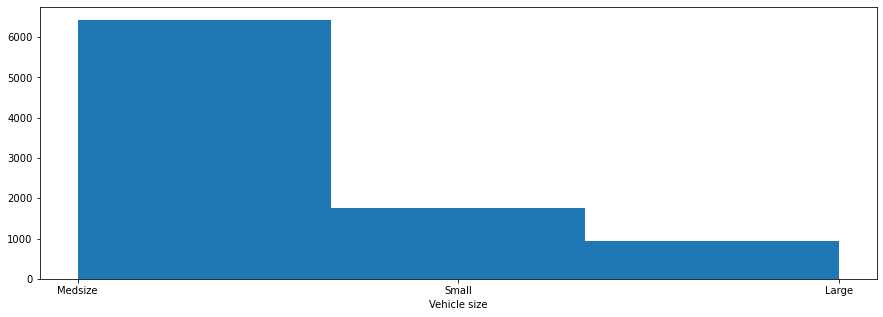

In [36]:
for col in categorical.columns:
    fig, axes = plt.subplots(figsize=(15,5))
    plt.hist(x=file[col], bins=file[col].nunique())
    axes.set_xlabel(col.capitalize())
    plt.show()

at a first glance all of our data seems to be skewed

In [37]:
corr=numerical.corr()
corr.style.background_gradient(cmap='RdBu_r').format(precision=2)

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly premium auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months since last claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months since policy inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number of open complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number of policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total claim amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


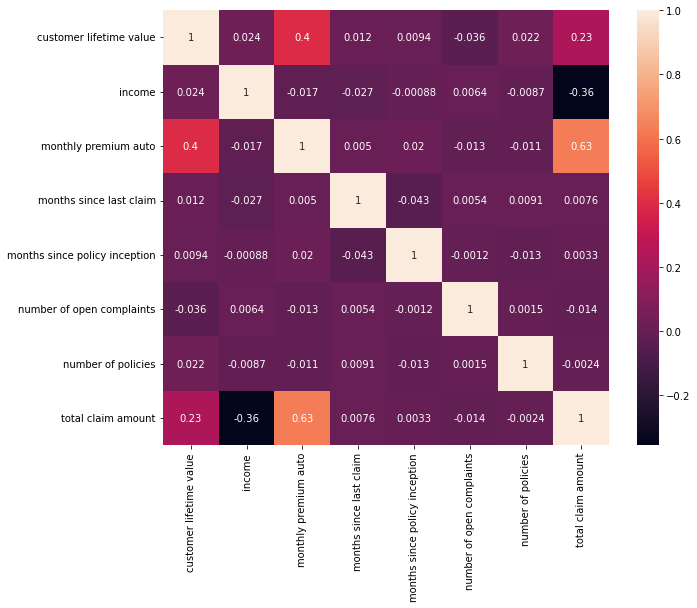

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, ax = ax)
plt.show()

at a frist glance there don't seem to be any features with a high correlation

''''

LAB 5 STARTS HERE

In [39]:
y=numerical['total claim amount']
X=numerical.drop('total claim amount', axis=1)

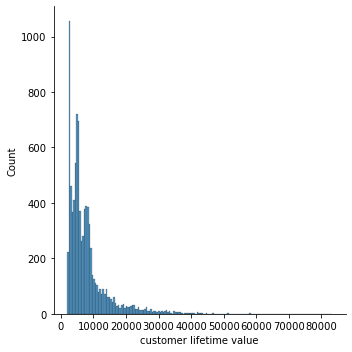

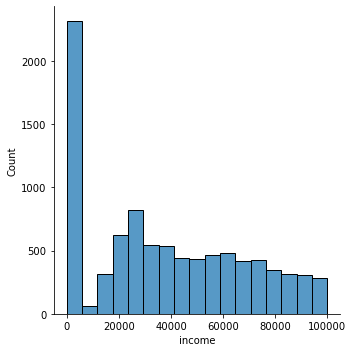

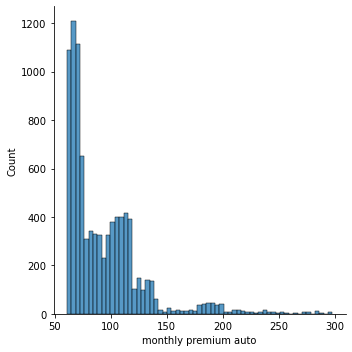

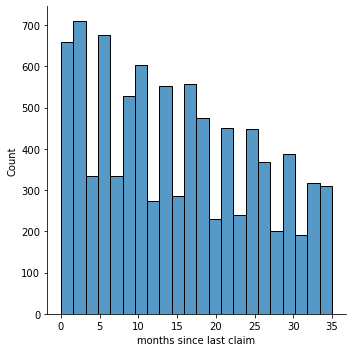

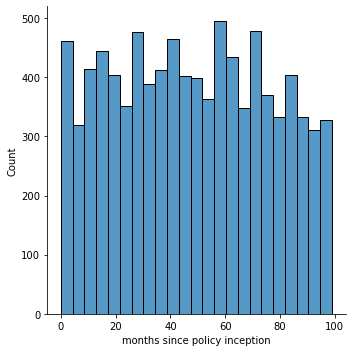

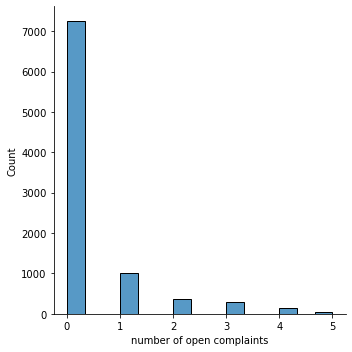

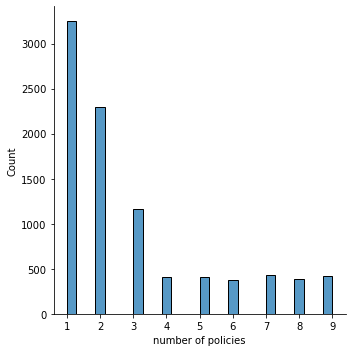

In [40]:
for i in range(X.shape[1]):
    sns.displot(X.iloc[:,i])
    plt.show()

In [41]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
transformer.fit(X)
X_stan = transformer.transform(X)
X_stan=pd.DataFrame(X_stan)
X_stan.columns=X.columns

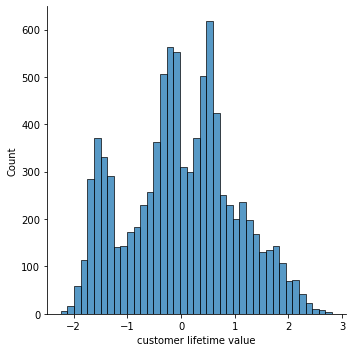

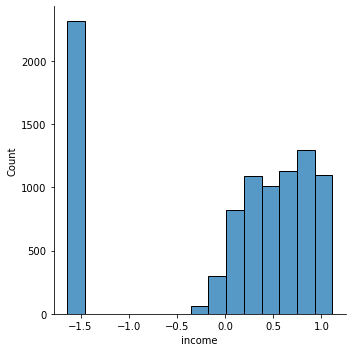

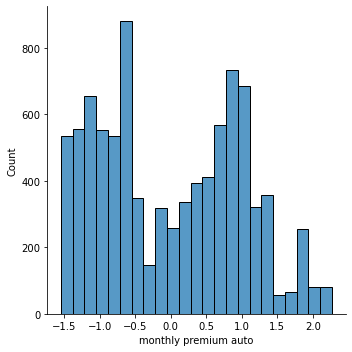

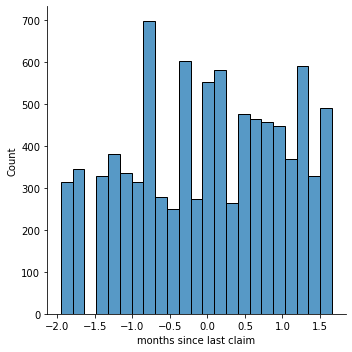

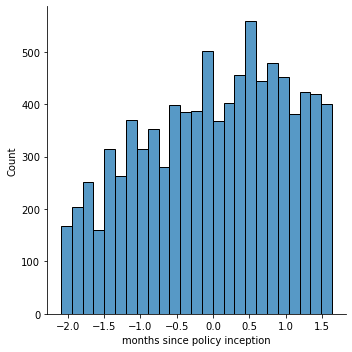

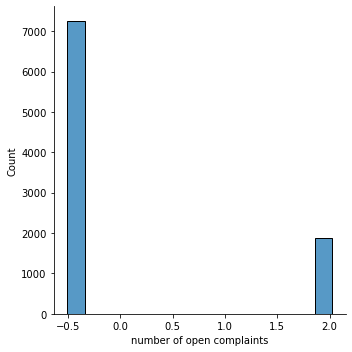

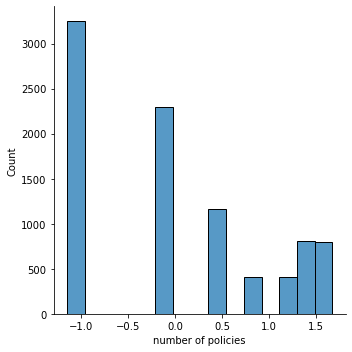

In [42]:
for i in range(X_stan.shape[1]):
    sns.displot(X_stan.iloc[:,i])
    plt.show()

''''

LAB 6 STARTS HERE

In [43]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(categorical)
encoded = encoder.transform(categorical).toarray()
cat_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
cat_encoded.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
X_f=pd.concat([X_stan, cat_encoded], axis=1)
X_f.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,state_Arizona,state_California,state_Nevada,...,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,-1.394947,0.691719,-0.850901,1.464556,-1.716791,-0.509289,-1.145850,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.271651,-1.641026,0.433173,-0.040371,-0.113063,-0.509289,1.577821,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.114847,0.596805,0.847014,0.416410,-0.255772,-0.509289,-0.058430,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.408620,-1.641026,0.796044,0.416410,0.644648,-0.509289,1.464360,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.357236,0.528534,-0.572139,-0.140125,-0.043160,-0.509289,-1.145850,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
print(X_f.shape)
print(y.shape)

(9134, 123)
(9134,)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_f, y, test_size=0.2, random_state=12)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 123)
(1827, 123)
(7307,)
(1827,)


In [48]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred_train = lm.predict(X_train)
R2_t=r2_score(y_train, y_pred_train)
print(R2_t)

0.760013742199007


In [50]:
y_pred_test = lm.predict(X_test)
R2_r=r2_score(y_test, y_pred_test)
print(R2_r)

0.7631139194273795


In [51]:
mse_t=mean_squared_error(y_train,y_pred_train)
mse_r=mean_squared_error(y_test,y_pred_test)
print(mse_t)
print(mse_r)

20087.695225320316
20627.550672696387


In [52]:
rmse_t=np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_r=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(rmse_t)
print(rmse_r)

141.731066549717
143.62294619139516


In [53]:
mae_t=mean_absolute_error(y_train, y_pred_train)
mae_r=mean_absolute_error(y_test, y_pred_test)
print(mae_t)
print(mae_r)

96.39563344313673
99.80720144061303


''''

LAB 7 STARTS HERE

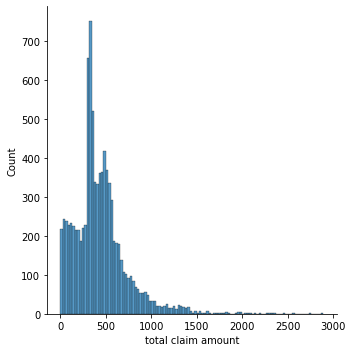

In [54]:
sns.displot(y)

In [55]:
new_num=numerical.copy()

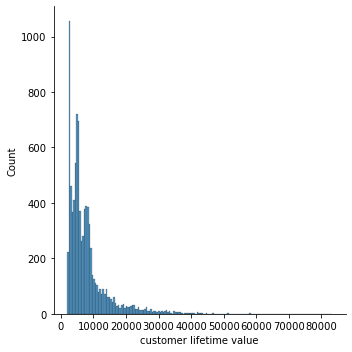

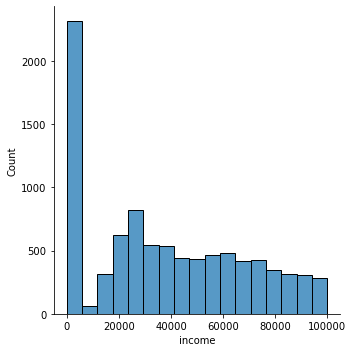

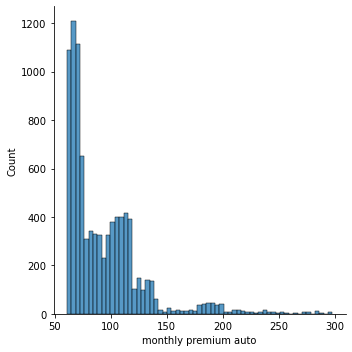

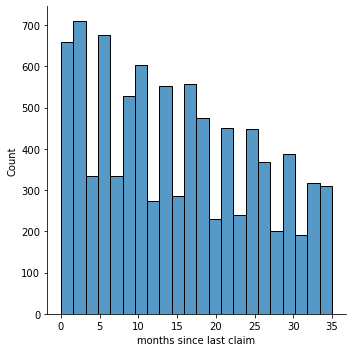

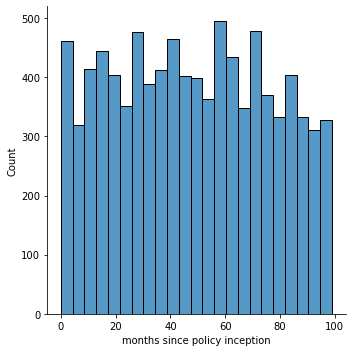

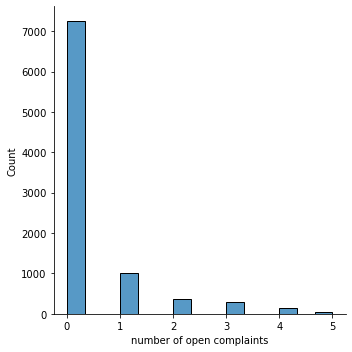

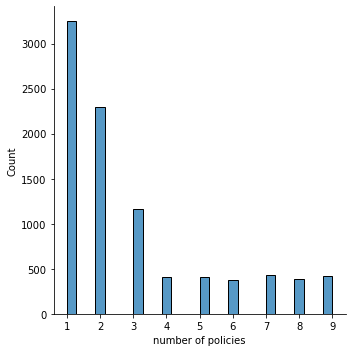

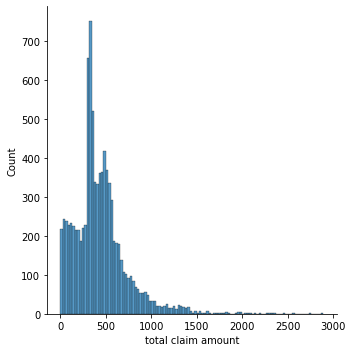

In [56]:
for col in numerical.columns:
    sns.displot(numerical[col])
    plt.show()

In [57]:
new_num.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [58]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
pt = PowerTransformer()
mms = MinMaxScaler()
ss= StandardScaler()

In [60]:
pt.fit(new_num)
num_tran = pt.transform(new_num)
num_tran=pd.DataFrame(num_tran)
num_tran.columns=new_num.columns

In [61]:
mms.fit(num_tran)
num_norm = mms.transform(num_tran)
num_norm=pd.DataFrame(num_norm)
num_norm.columns=new_num.columns

In [62]:
ss.fit(num_norm)
num_stan = ss.transform(num_norm)
num_stan=pd.DataFrame(num_stan)
num_stan.columns=new_num.columns

In [63]:
num_stan.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,5.649569e-17,1.000055,-2.238398,-0.667814,-0.025657,0.637148,2.811682
income,9134.0,-1.972730e-16,1.000055,-1.641026,-1.641026,0.371748,0.761691,1.112755
monthly premium auto,9134.0,-1.864431e-16,1.000055,-1.545512,-0.926893,-0.015822,0.871640,2.270116
months since last claim,9134.0,-9.157456e-17,1.000055,-1.952966,-0.832056,0.056223,0.821478,1.660758
months since policy inception,9134.0,1.968355e-16,1.000055,-2.095014,-0.793936,0.094013,0.828771,1.636206
number of open complaints,9134.0,1.183274e-15,1.000055,-0.509289,-0.509289,-0.509289,-0.509289,2.026024
number of policies,9134.0,7.951696e-17,1.000055,-1.145850,-1.145850,-0.058430,0.884748,1.670427
total claim amount,9134.0,-8.626138e-17,1.000055,-2.821922,-0.444420,0.003195,0.547737,4.749093


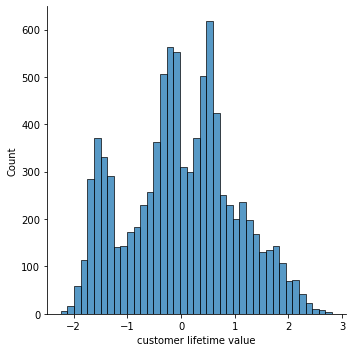

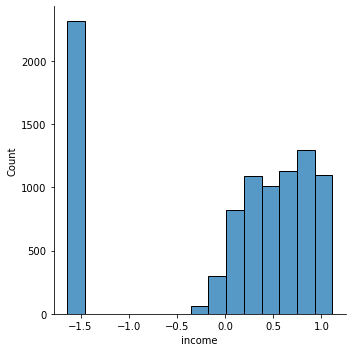

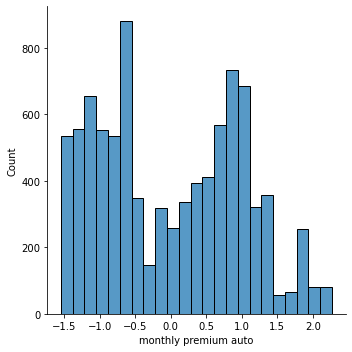

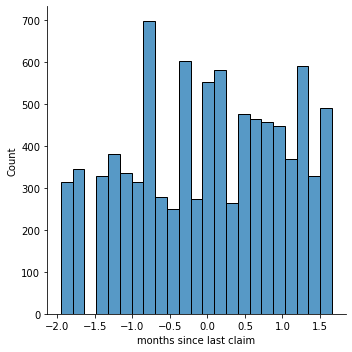

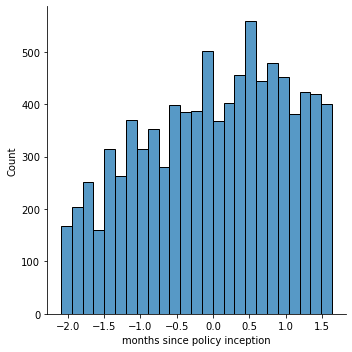

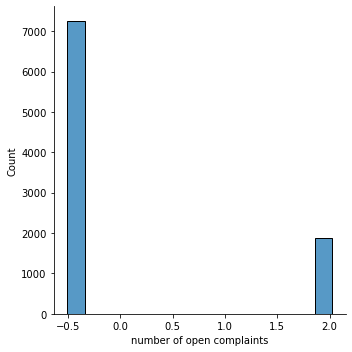

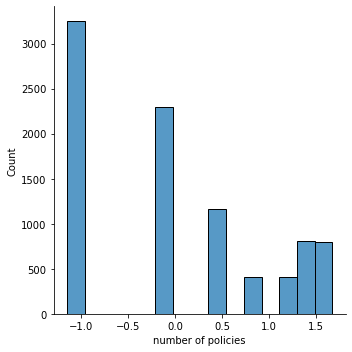

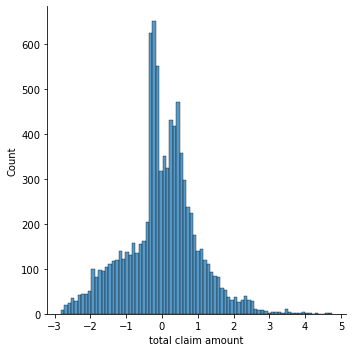

In [64]:
for col in num_stan.columns:
    sns.displot(num_stan[col])

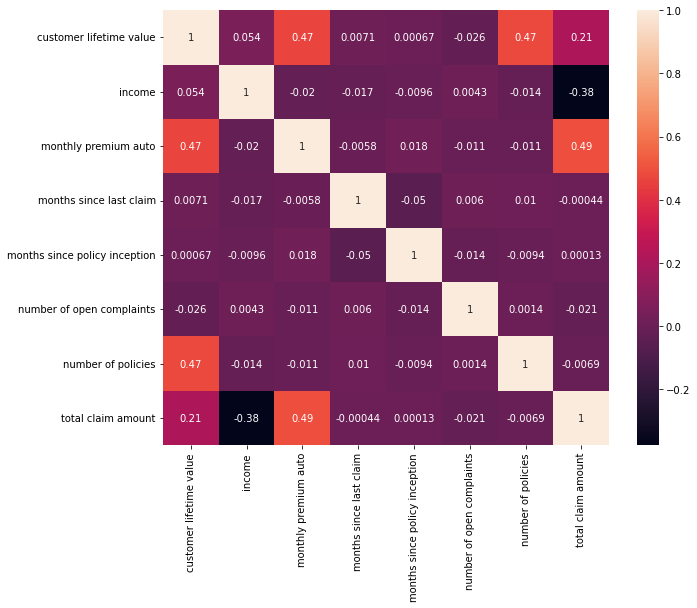

In [65]:
num_stan_corr=num_stan.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(num_stan_corr, annot=True, ax = ax)
plt.show()

In [66]:
y_n=num_stan['total claim amount']
X_n=num_stan[['customer lifetime value', 'income','monthly premium auto']]
display(y_n.shape)
display(X_n.shape)

(9134,)

(9134, 3)

In [67]:
X_nf=pd.concat([X_n, cat_encoded], axis=1)
X_nf.tail()

,customer lifetime value,income,monthly premium auto,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,...,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
9129,1.780246,0.863520,-0.572139,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,-1.160398,0.122833,-0.217718,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.504458,-1.641026,0.076464,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.384885,0.130888,0.501425,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9133,-1.514795,-1.641026,-0.328367,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [82]:
from sklearn.model_selection import train_test_split
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_nf, y, test_size=0.3, random_state=25)

In [83]:
print(X_n_train.shape)
print(X_n_test.shape)
print(y_n_train.shape)
print(y_n_test.shape)

(6393, 119)
(2741, 119)
(6393,)
(2741,)


In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 123)
(1827, 123)
(7307,)
(1827,)


In [85]:
lm = LinearRegression()
lm.fit(X_n_train,y_n_train)

LinearRegression()

In [96]:
y_n_pred_train = lm.predict(X_n_train)
R2_nt=r2_score(y_n_train, y_n_pred_train)
print(f'new train r2 score is: {R2_nt}')
print(f'old train r2 score is: {R2_t}')

new train r2 score is 0.7678919640654266
old train r2 scrore is 0.760013742199007


In [97]:
y_n_pred_test = lm.predict(X_n_test)
R2_nr=r2_score(y_n_test, y_n_pred_test)
print(f'new test r2 score is: {R2_t}')
print(f'old test r2 score is: {R2_t}')

new test r2 score is: 0.760013742199007
old test r2 score is: 0.760013742199007


In [98]:
mse_nt=mean_squared_error(y_n_train,y_n_pred_train)
mse_nr=mean_squared_error(y_n_test,y_n_pred_test)
print(f'new train mse is: {mse_nt}')
print(f'old train mse is: {mse_t}')

new train mse is: 20677.671332154812
old train mse is: 20087.695225320316


In [99]:
print(f'new test mse is: {mse_nr}')
print(f'old test mse is: {mse_r}')

new test mse is: 19460.46390510988
old test mse is: 19460.46390510988


In [100]:
rmse_nt=np.sqrt(mean_squared_error(y_n_train,y_n_pred_train))
rmse_nr=np.sqrt(mean_squared_error(y_n_test,y_n_pred_test))
print(f'new train rmse is: {rmse_nt}')
print(f'old train rmse is: {rmse_t}')

new train rmse is: 143.79732727750823
old train rmse is: 141.731066549717


In [101]:
print(f'new test rmse is: {rmse_nr}')
print(f'old test rmse is: {rmse_r}')

new test rmse is: 139.50076668287483
old test rmse is: 143.62294619139516


In [102]:
mae_nt=mean_absolute_error(y_n_train, y_n_pred_train)
mae_nr=mean_absolute_error(y_n_test, y_n_pred_test)
print(f'new train mae is: {mae_nt}')
print(f'old train mae is: {mae_t}')

new train mae is: 97.63514616033162
old train mae is: 96.39563344313673


In [103]:
print(f'new test mae is: {mae_nr}')
print(f'old test mae is: {mae_r}')

new test mae is: 97.4197182572054
old test mae is: 99.80720144061303
